Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### Load the dataset 
automobile_df = pd.read_csv("automobile.txt")

print(automobile_df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [5]:
# Load the dataset into a DataFrame
automobile_df = pd.read_csv("automobile.txt", na_values='?')

# Identify and handle missing values
automobile_df = automobile_df.replace('?', np.nan)

# Identify constant columns
constant_columns = automobile_df.columns[automobile_df.nunique() == 1]

# Identify and handle highly correlated columns
correlation_matrix = automobile_df.select_dtypes(include=[np.number]).corr()
correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

# Display the identified columns
print("Constant Columns:", constant_columns)
print("Correlated Columns:", correlated_columns)


Constant Columns: Index([], dtype='object')
Correlated Columns: {'price', 'curb-weight', 'highway-mpg', 'width', 'length', 'city-mpg', 'horsepower', 'engine-size'}


#### Remove any duplicate rows

In [6]:
# Remove duplicate rows
automobile_df = automobile_df.drop_duplicates()

# Display the first few rows of the DataFrame after removing duplicates
print(automobile_df.head())


   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
# Remove rows with missing data
automobile_df = automobile_df.dropna()

# Display the first few rows of the DataFrame after removing missing data
print(automobile_df.head())

    symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
3           2              164.0  audi       gas        std         four   
4           2              164.0  audi       gas        std         four   
6           1              158.0  audi       gas        std         four   
8           1              158.0  audi       gas      turbo         four   
10          2              192.0   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front        99.8  ...          109   
4       sedan          4wd           front        99.4  ...          136   
6       sedan          fwd           front       105.8  ...          136   
8       sedan          fwd           front       105.8  ...          131   
10      sedan          rwd           front       101.2  ...          108   

    fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
3    

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [ ]:
# Change the release_date column to DateTime


# Extract the release year from every release date


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [ ]:
# Code here

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

### Finding Certain Genres
Locate all movies in the "Action" genre. 

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [ ]:
# Code here



#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [ ]:
# Code here




#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [ ]:
# Code here



#### Find Movies which are rated above 7

In [ ]:
# Code here




#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [ ]:
 # Code here

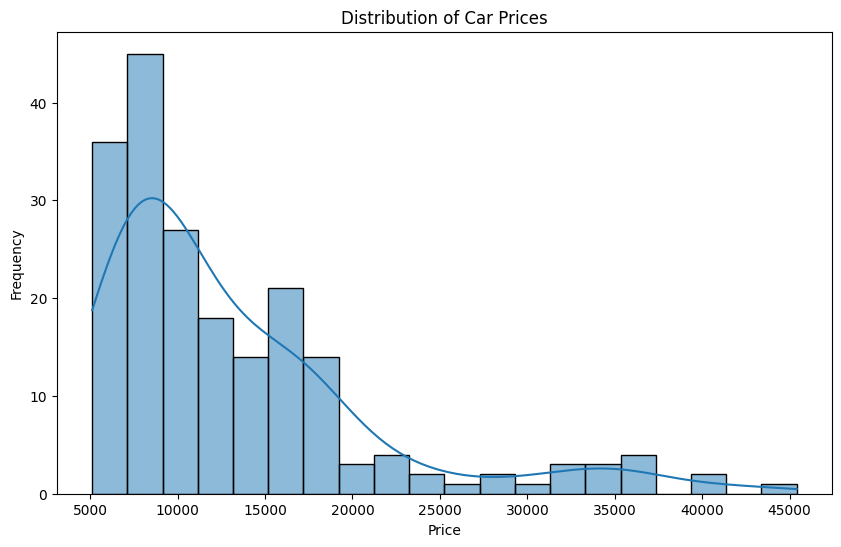

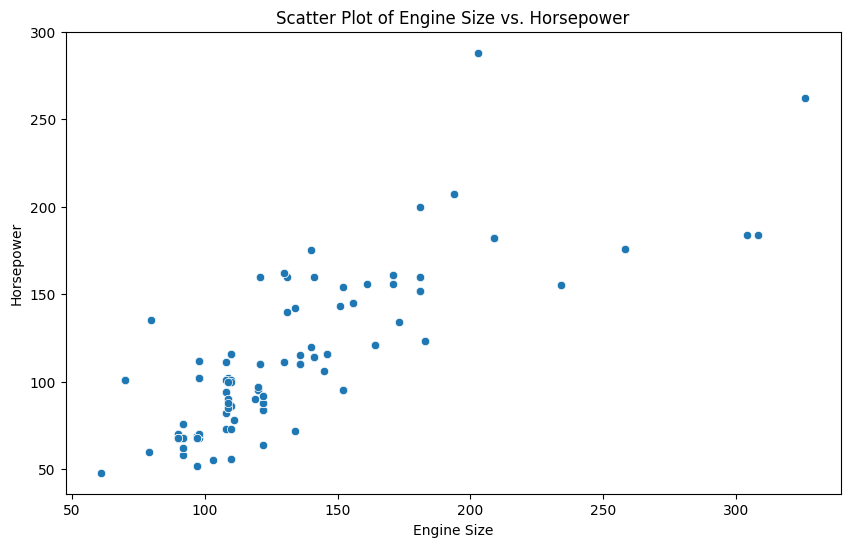

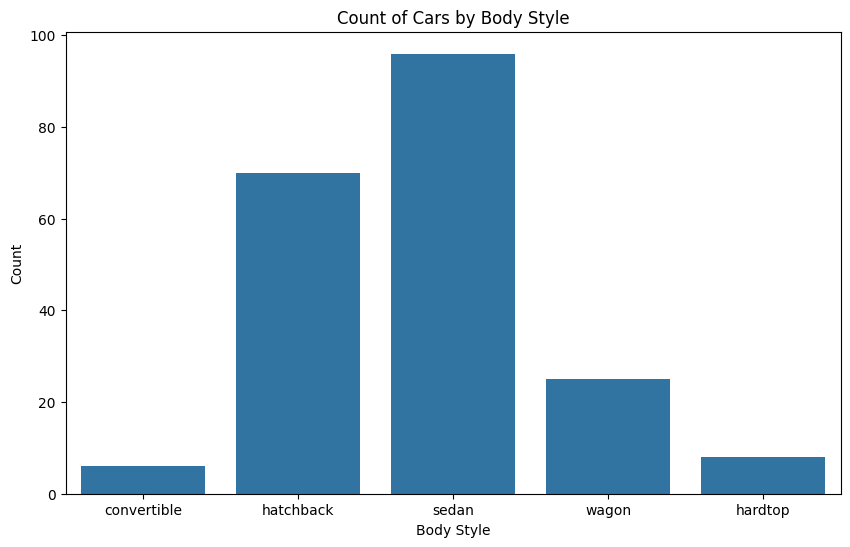

In [3]:
# Generate # Load the dataset into a DataFrame
automobile_df = pd.read_csv("automobile.txt", na_values='?')

# Visualization 1: Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(automobile_df['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Scatter Plot of Engine Size vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='horsepower', data=automobile_df)
plt.title('Scatter Plot of Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

# Visualization 3: Categorical Bar Chart of Car Types
plt.figure(figsize=(10, 6))
sns.countplot(x='body-style', data=automobile_df)
plt.title('Count of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()





